<a href="https://colab.research.google.com/github/manasik29/PCA---Principal-Component-Analysis/blob/main/PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q. Perform Principal component analysis and perform clustering using first 3 principal component scores, both heirarchial and k mean clustering(scree plot or elbow curve).

#Obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data 

(class column we have ignored at the begining who shows it has 3 clusters)df

# **Load data and libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df = pd.read_csv('/content/wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# **EDA**

In [5]:
#check for missing values
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

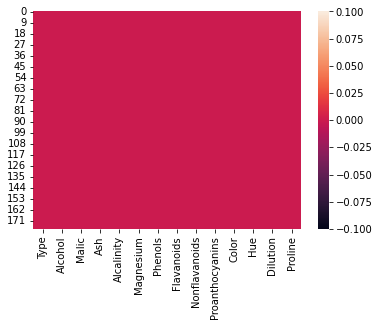

In [7]:
sns.heatmap(df.isna())

In [8]:
#check for duplicated values
df[df.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [10]:
df[df.duplicated()].shape

(0, 14)

No missing and duplicate values.

In [11]:
#check for data types of column.
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

Data types are correct so no conversion is required as of now. 

In [12]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We are going to ignore the 1st column as it is reflecting 3 clusters.

In [4]:
data = df.iloc[:,1:]

# **Data Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


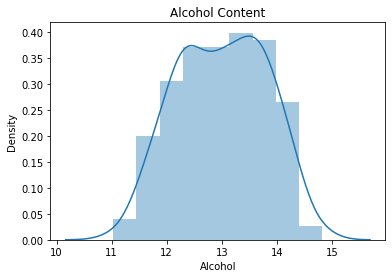

In [30]:
#Univariate Analysis
plt.title('Alcohol Content')
sns.distplot(data.Alcohol)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


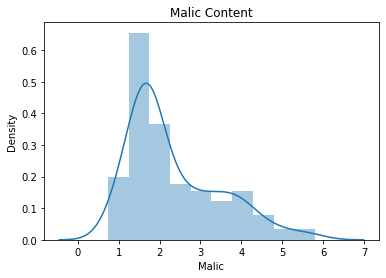

In [31]:
plt.title('Malic Content')
sns.distplot(data.Malic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


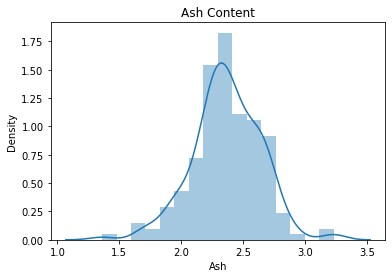

In [32]:
plt.title('Ash Content')
sns.distplot(data.Ash)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


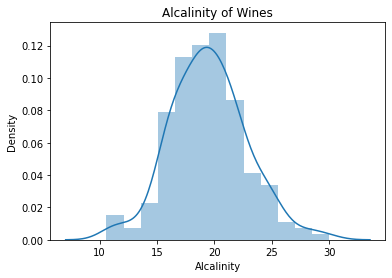

In [45]:
plt.title('Alcalinity of Wines')
sns.distplot(data.Alcalinity)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


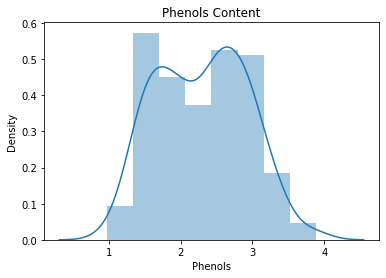

In [34]:
plt.title('Phenols Content')
sns.distplot(data.Phenols)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


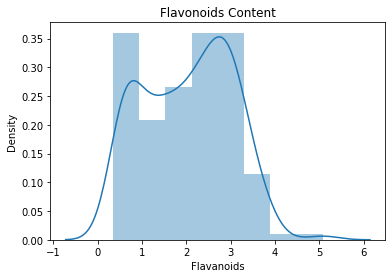

In [35]:
plt.title('Flavonoids Content')
sns.distplot(data.Flavanoids)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


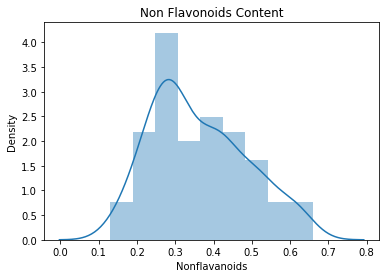

In [36]:
plt.title('Non Flavonoids Content')
sns.distplot(data.Nonflavanoids)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


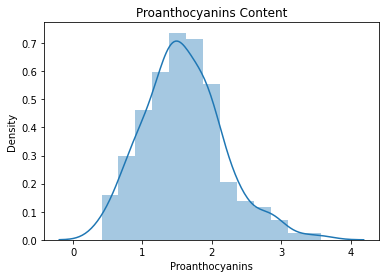

In [37]:
plt.title('Proanthocyanins Content')
sns.distplot(data.Proanthocyanins)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


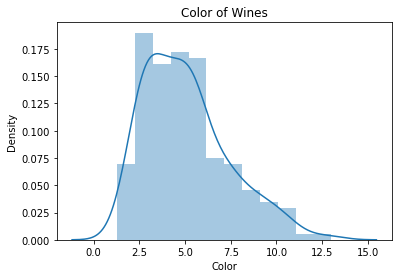

In [44]:
plt.title('Color of Wines')
sns.distplot(data.Color)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


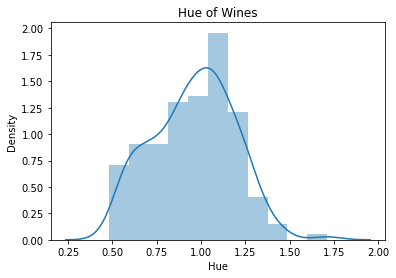

In [42]:
plt.title('Hue of Wines')
sns.distplot(data.Hue)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


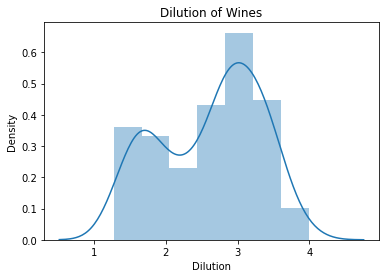

In [43]:
plt.title('Dilution of Wines')
sns.distplot(data.Dilution)

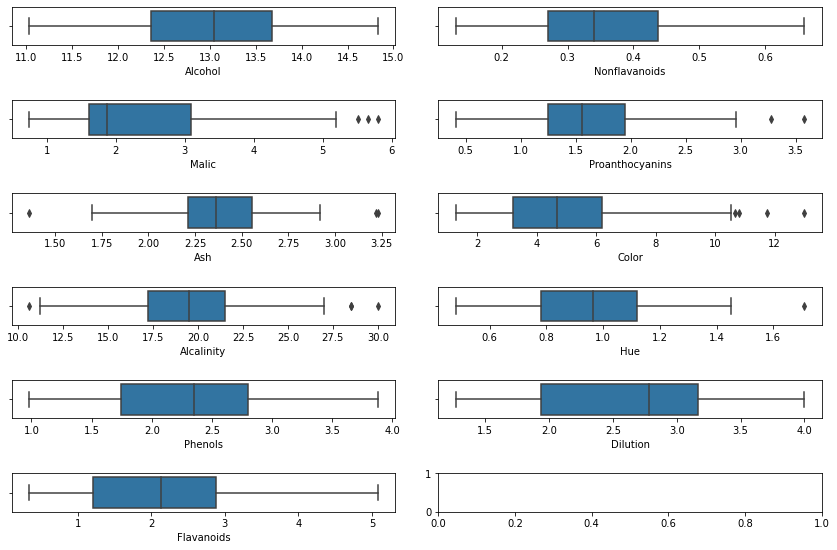

In [46]:
#Outlier Detection
fig, axes=plt.subplots(6,2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=df,ax=axes[0,0])
sns.boxplot(x='Malic',data=df,ax=axes[1,0])
sns.boxplot(x='Ash',data=df,ax=axes[2,0])
sns.boxplot(x='Alcalinity',data=df,ax=axes[3,0])
sns.boxplot(x='Phenols',data=df,ax=axes[4,0])
sns.boxplot(x='Flavanoids',data=df,ax=axes[5,0])
sns.boxplot(x='Nonflavanoids',data=df,ax=axes[0,1])
sns.boxplot(x='Proanthocyanins',data=df,ax=axes[1,1])
sns.boxplot(x='Color',data=df,ax=axes[2,1])
sns.boxplot(x='Hue',data=df,ax=axes[3,1])
sns.boxplot(x='Dilution',data=df,ax=axes[4,1])
plt.tight_layout(pad=2.0)

We can observe there are few outliers in Color, Alcalinity, Ash, Malic & Proanthocyanins. 

Let us try log or sqrt transformation on them.

**SquareRoot Transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

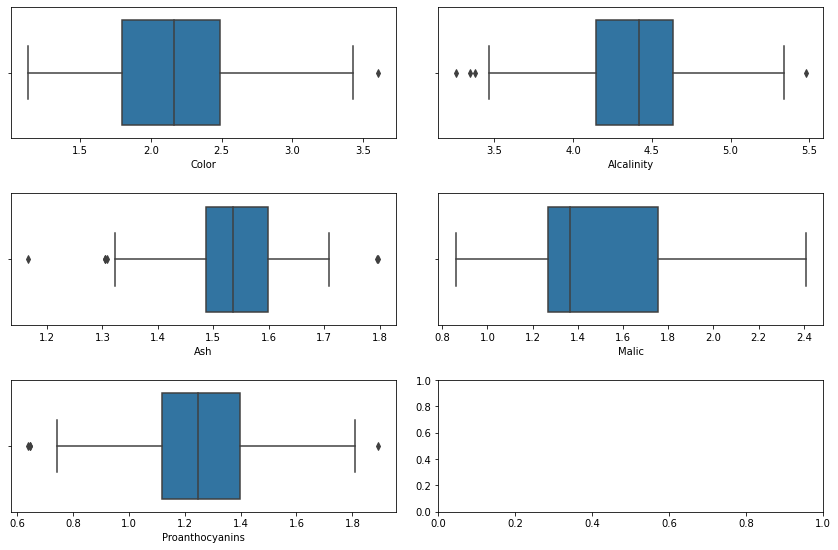

In [49]:
#use sqrt transformation to check
fig, axes=plt.subplots(3,2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(np.sqrt(df.Color), ax=axes[0,0])
sns.boxplot(np.sqrt(df.Alcalinity), ax=axes[0,1])
sns.boxplot(np.sqrt(df.Ash), ax=axes[1,0])
sns.boxplot(np.sqrt(df.Malic), ax=axes[1,1])
sns.boxplot(np.sqrt(df.Proanthocyanins), ax=axes[2,0])
plt.tight_layout(pad=2.0)

**Log Transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

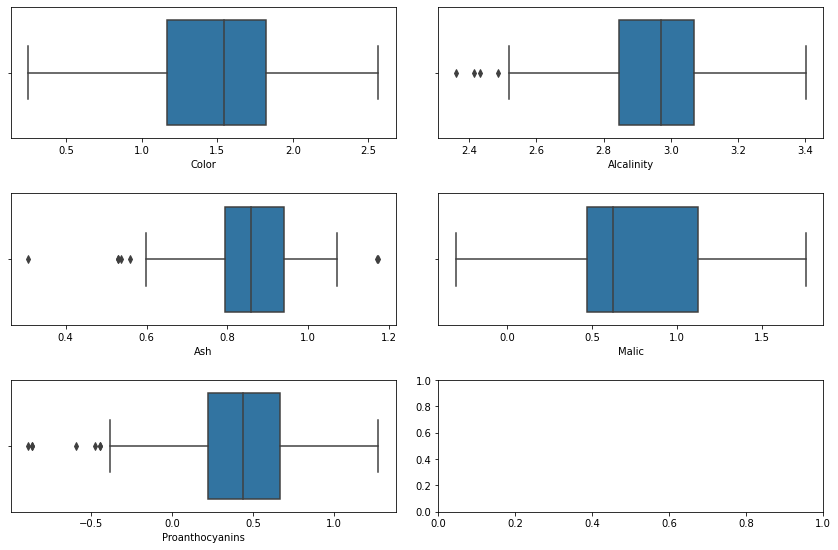

In [50]:
#use log transformation to check
fig, axes=plt.subplots(3,2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(np.log(df.Color), ax=axes[0,0])
sns.boxplot(np.log(df.Alcalinity), ax=axes[0,1])
sns.boxplot(np.log(df.Ash), ax=axes[1,0])
sns.boxplot(np.log(df.Malic), ax=axes[1,1])
sns.boxplot(np.log(df.Proanthocyanins), ax=axes[2,0])
plt.tight_layout(pad=2.0)

**Cuberoot Transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

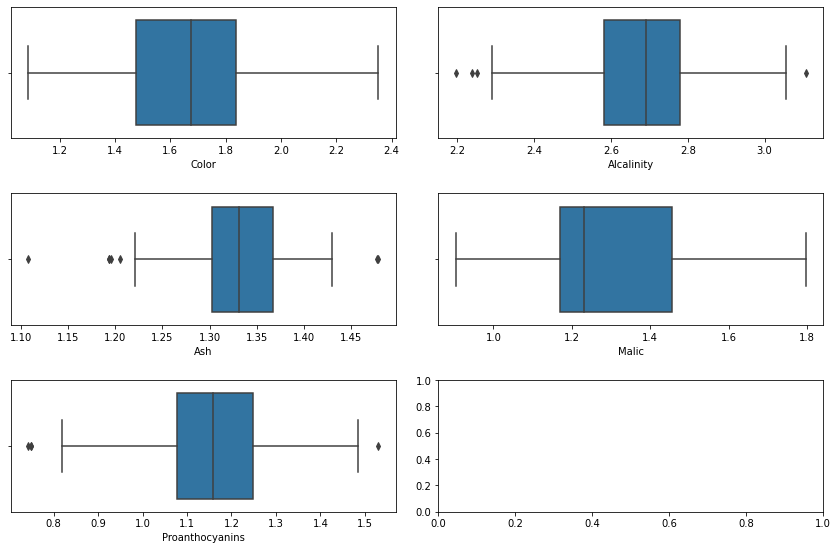

In [55]:
#use cbrt transformation to check
fig, axes=plt.subplots(3,2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(np.cbrt(df.Color), ax=axes[0,0])
sns.boxplot(np.cbrt(df.Alcalinity), ax=axes[0,1])
sns.boxplot(np.cbrt(df.Ash), ax=axes[1,0])
sns.boxplot(np.cbrt(df.Malic), ax=axes[1,1])
sns.boxplot(np.cbrt(df.Proanthocyanins), ax=axes[2,0])
plt.tight_layout(pad=2.0)
plt.show()

A we check from the visualisation, we were only able to treat outliers in Malic and Color by cuberoot and log transformation.

But for the rest any transformation was not helpful.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


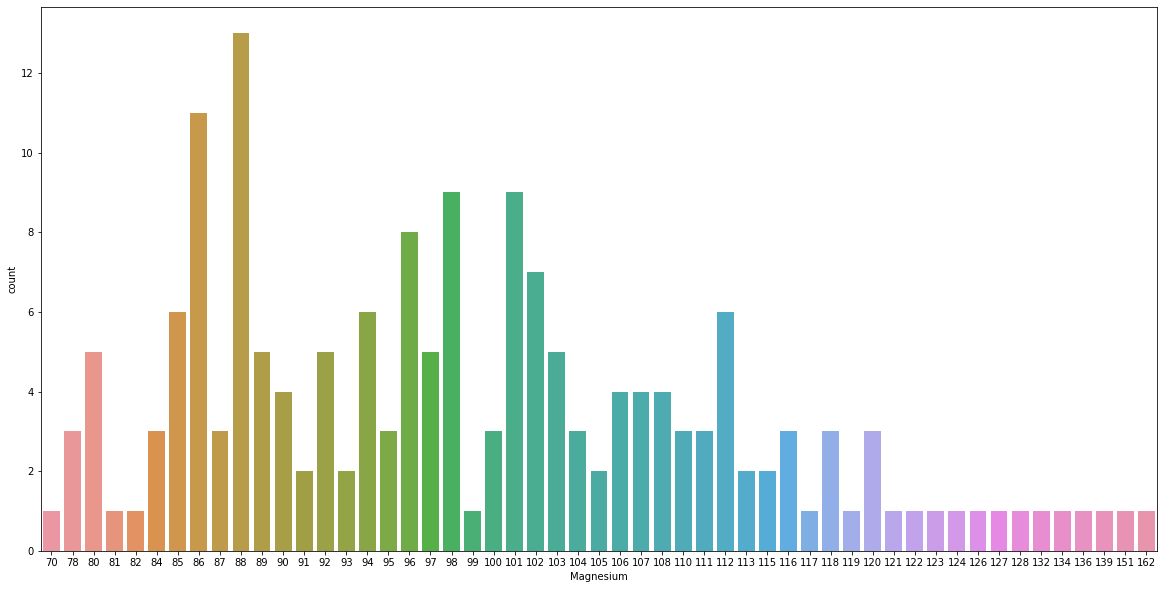

In [58]:
#Univariate Analysis for int columns : Magnesium and Proline
plt.figure(figsize=(20,10))
sns.countplot(df.Magnesium)

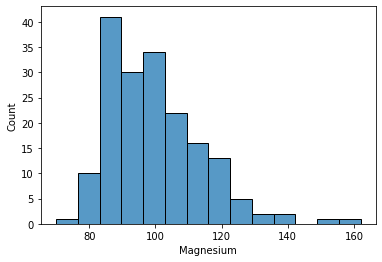

In [64]:
sns.histplot(df.Magnesium)

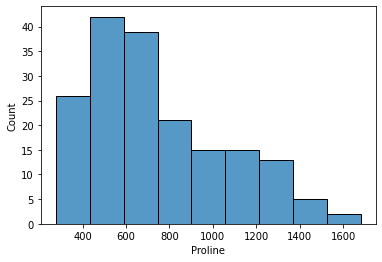

In [63]:
sns.histplot(df.Proline)

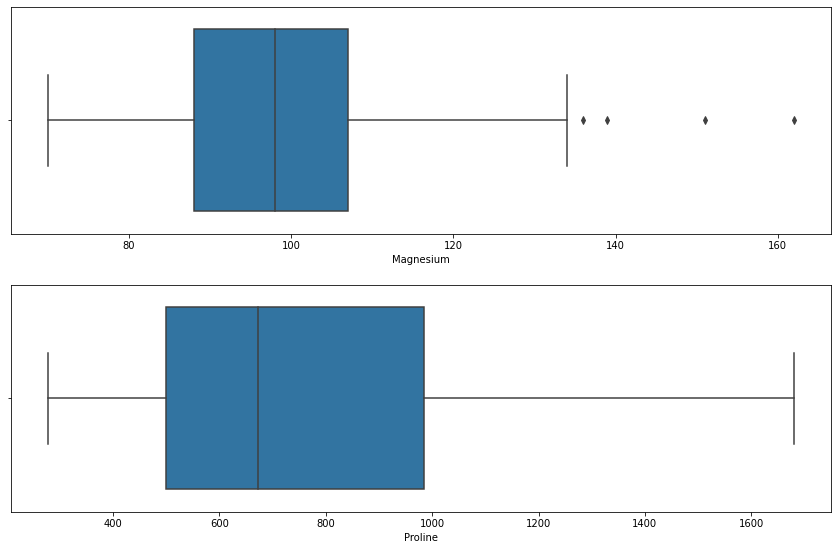

In [65]:
fig, axes=plt.subplots(2,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Magnesium',data=df,ax=axes[0])
sns.boxplot(x='Proline',data=df,ax=axes[1])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


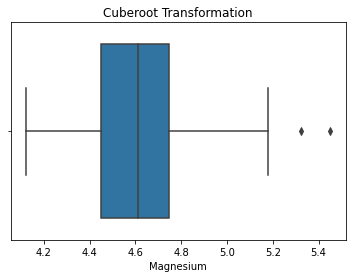

In [72]:
plt.title('Cuberoot Transformation')
sns.boxplot(np.cbrt(df.Magnesium))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


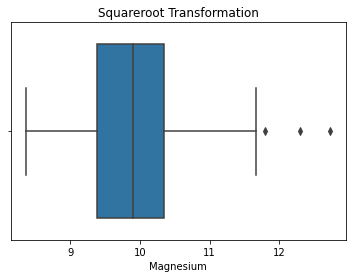

In [74]:
plt.title('Squareroot Transformation')
sns.boxplot(np.sqrt(df.Magnesium))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


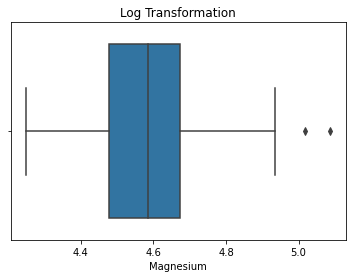

In [75]:
plt.title('Log Transformation')
sns.boxplot(np.log(df.Magnesium))

We can see here than no transformation was not able treat outliers in Magnesium.

In [77]:
data.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


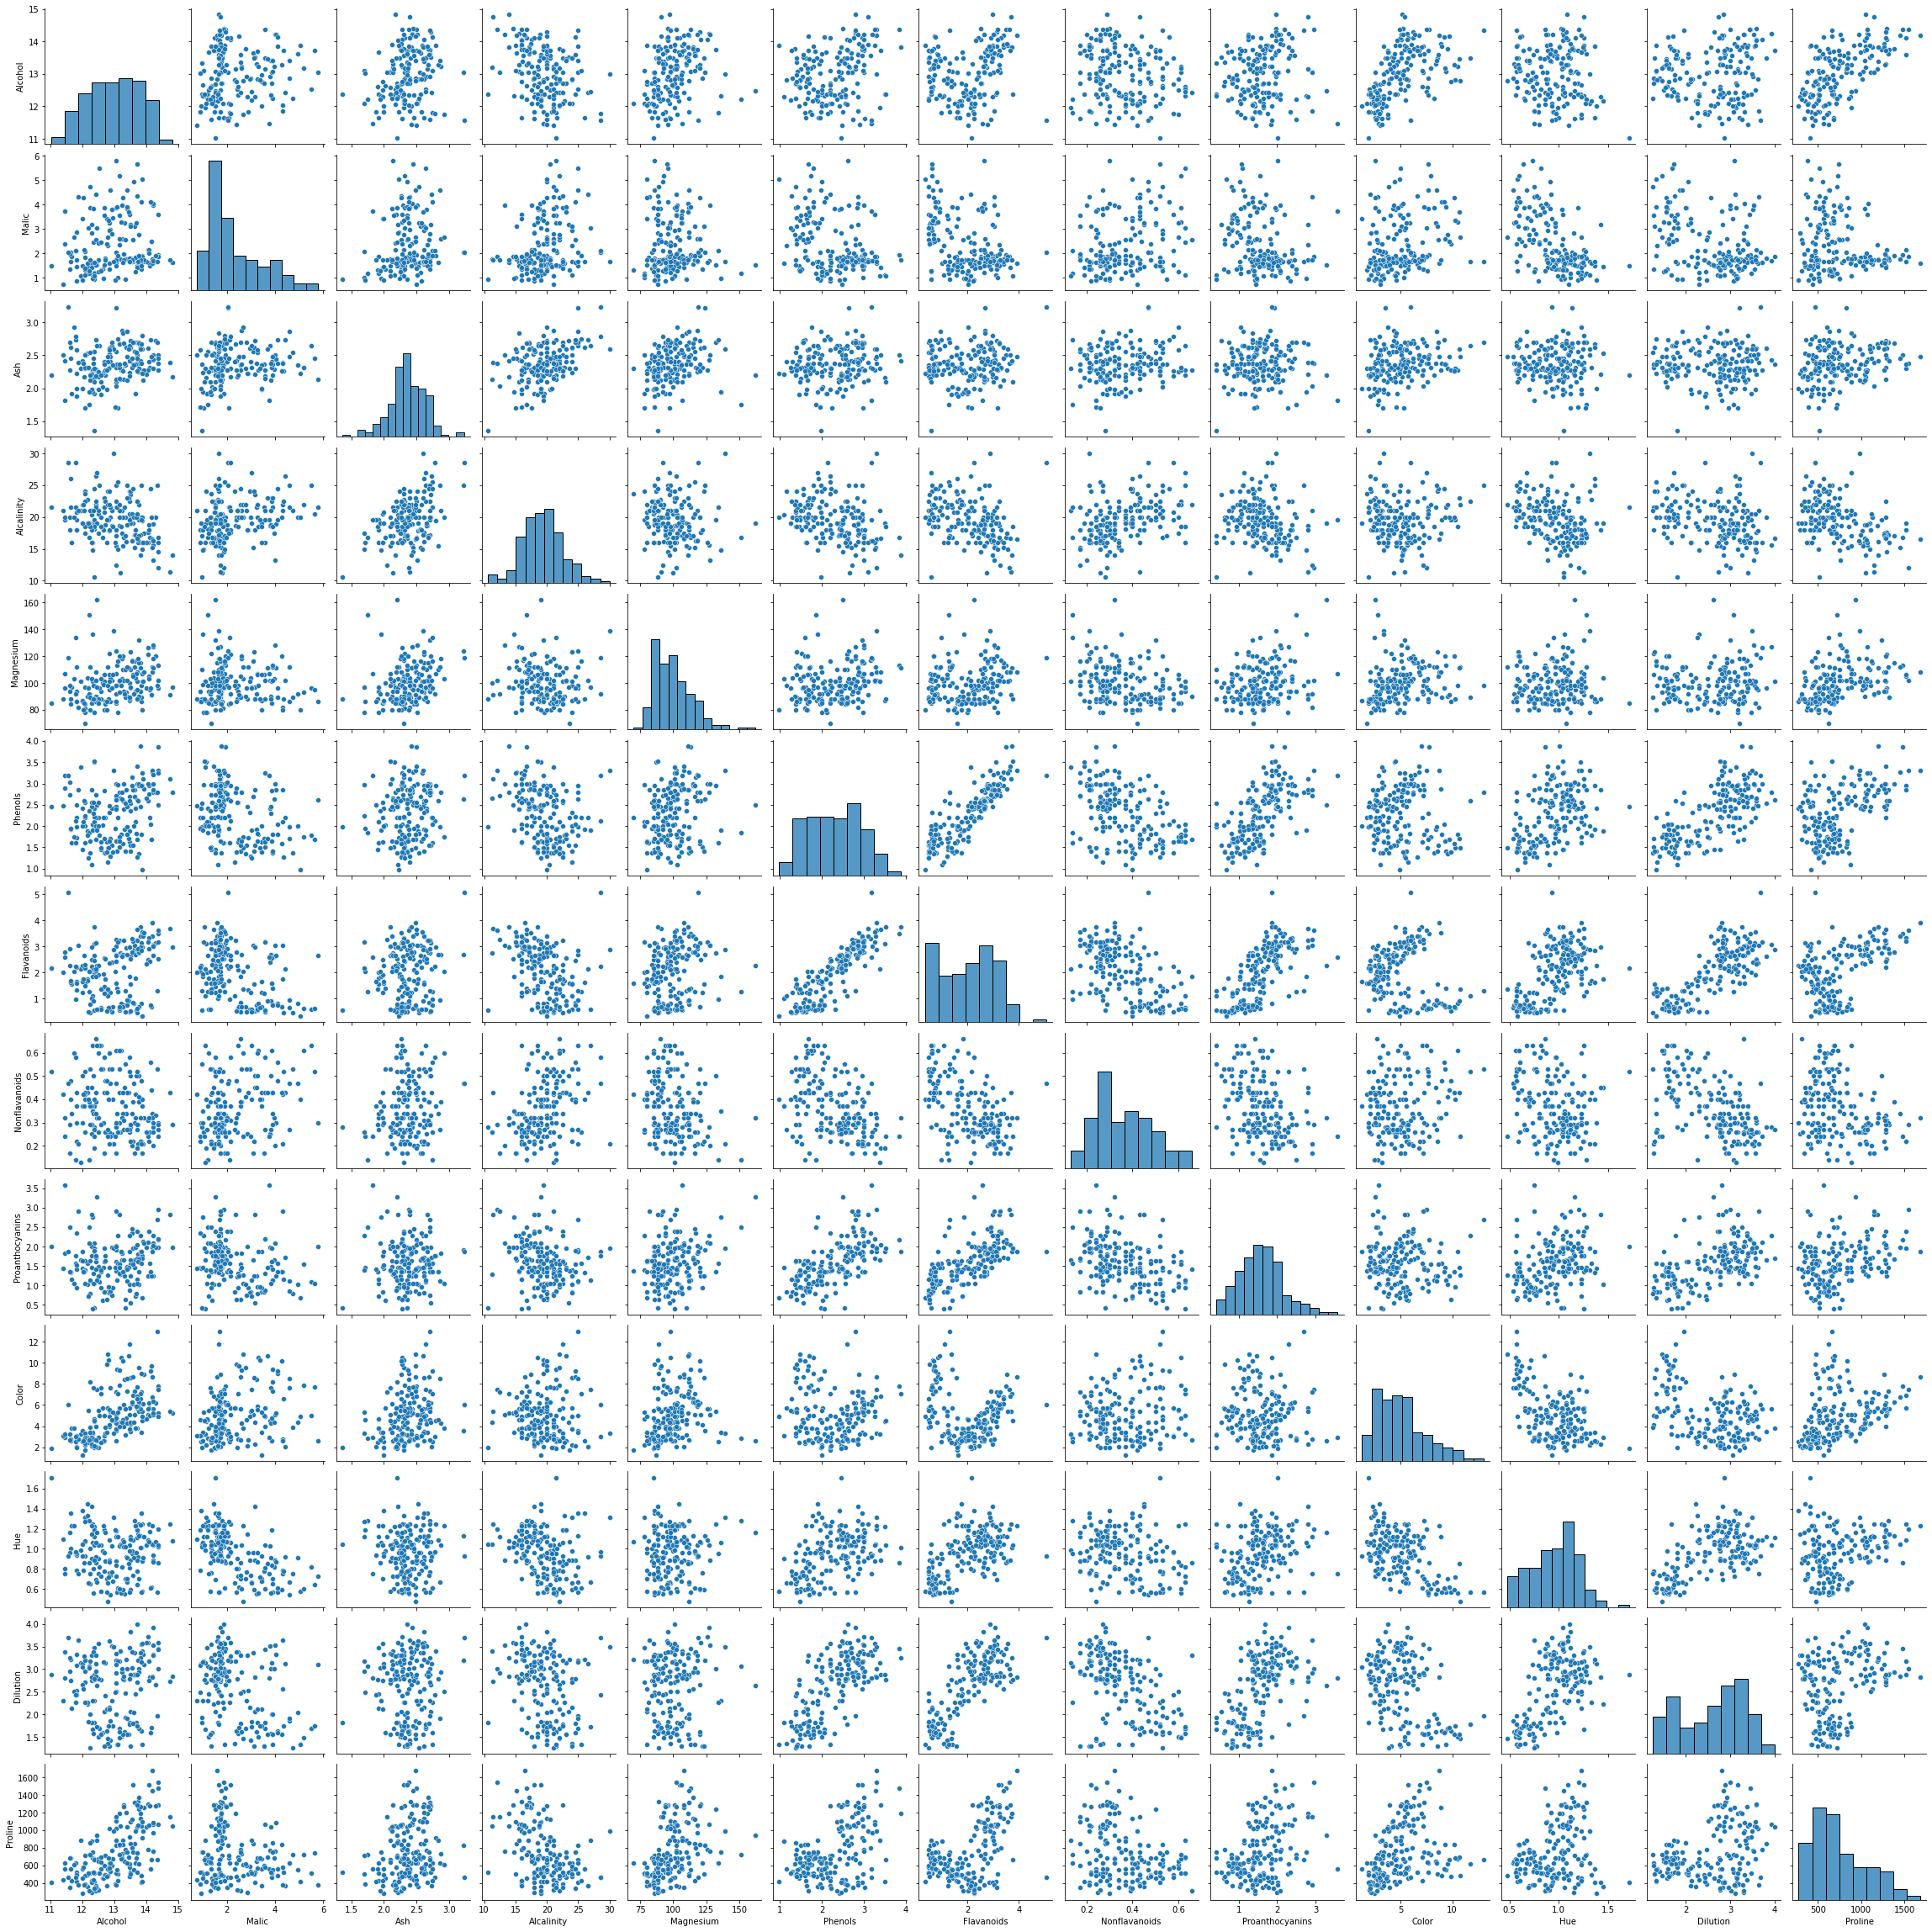

In [76]:
sns.pairplot(data)

# **PCA**

In [6]:
#convert into numpy array
wine = data.values
wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
#Normalising the numerical data
wine_norm = scale(wine)

In [9]:
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [10]:
pca = PCA()
pca_values = pca.fit_transform(wine_norm)

In [11]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [18]:
#if we want to give number of components, pass an argument in PCA
pca = PCA(n_components=13)
pca_values = pca.fit_transform(wine_norm)

In [20]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [21]:
#The amount of variance each pca explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
#if we want cummulative sum of variance
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

If we are choosing only first 3 columns we will be getting 66.53% of data. 

In [23]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

#**Variance plot for PCA components obtained**

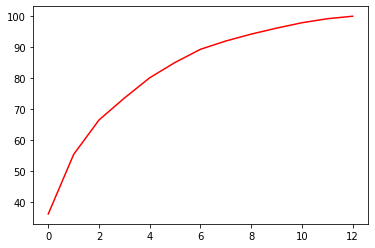

In [24]:
plt.plot(var1, color = 'red')

In [25]:
#if we want to choose only first 3 pc's
pca_values[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [28]:
final_df = pd.DataFrame(pca_values[:,0:3], columns=['pc1','pc2','pc3'])

In [29]:
final_df

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# **PCA plot in 2-D**

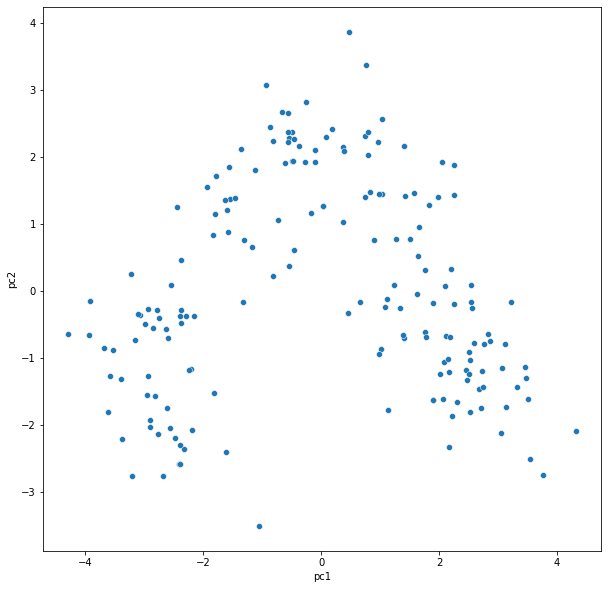

In [32]:
import seaborn as sns
plt.figure(figsize=[10,10])
sns.scatterplot(data=final_df,x='pc1',y='pc2')
plt.show()

# **Perform Clustering on the PCA data.**

**Heirarchical Clustering**

Complete Method

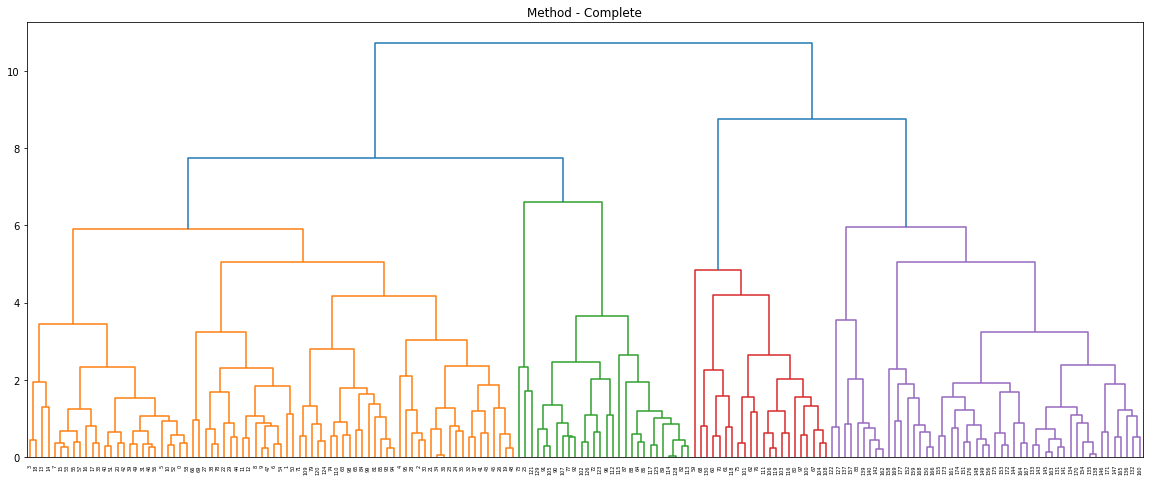

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(final_df, method='complete'))
plt.title("Method - Complete")
plt.show()

In [46]:
#create clusters using method - complete
hc_c = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'complete')

In [47]:
y_hc = hc_c.fit_predict(final_df)
Clusters_c = pd.DataFrame(y_hc, columns=['Clusters'])

In [48]:
Clusters_c

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [67]:
data['h_clusterid'] = Clusters_c
Clusters_c.value_counts()

Clusters
0           106
1            50
2            22
dtype: int64

In [68]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [66]:
df = pd.read_csv('/content/wine.csv')
data = df.iloc[:,1:]

**Clusters available in the original data**

In [69]:
df.groupby('Type').agg(['mean']).reset_index()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


**Clusters by after doing PCA and hierarchical clustering -**

In [70]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.065000,1.993396,2.406509,18.758491,101.990566,2.632075,2.663019,0.319151,1.858491,4.438585,1.063302,3.038113,853.707547
1,1,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636


Average Method

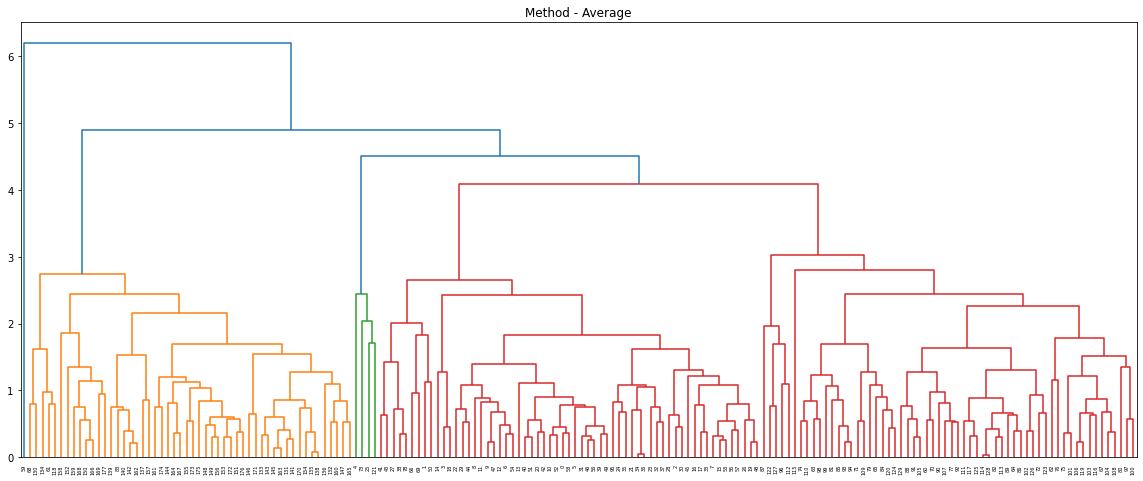

In [57]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(final_df, method='average'))
plt.title("Method - Average")
plt.show()

In [60]:
#create clusters using method - average
hc_a = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'average')

In [61]:
y_hc_a = hc_a.fit_predict(final_df)
Clusters_a = pd.DataFrame(y_hc_a, columns=['Clusters'])

In [62]:
Clusters_a

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [71]:
df = pd.read_csv('/content/wine.csv')
data = df.iloc[:,1:]

In [72]:
data['h_clusterid'] = Clusters_a
Clusters_a.value_counts()

Clusters
0           125
2            52
1             1
dtype: int64

In [73]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

**Clusters in the original data**

In [74]:
df.groupby('Type').agg(['mean']).reset_index()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


**Clusters after performing PCA and Average method heirarchical clustering**

In [75]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.948480,1.962560,2.353760,18.873600,100.192000,2.545120,2.540640,0.324240,1.791200,4.210000,1.064528,2.996800,800.840000
1,1,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
2,2,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923


Single Method

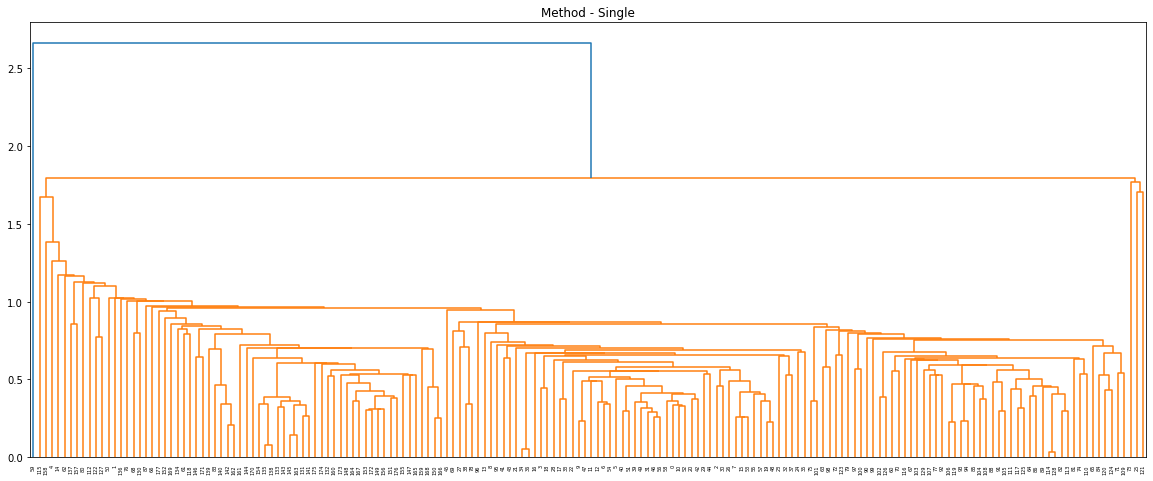

In [76]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(final_df, method='single'))
plt.title("Method - Single")
plt.show()

In [77]:
#creating clusters method - single
hc_s = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')

In [78]:
y_hc_s = hc_s.fit_predict(final_df)
Clusters_s = pd.DataFrame(y_hc_s, columns=['Cluster'])

In [79]:
Clusters_s

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
173,2
174,2
175,2
176,2


In [84]:
df = pd.read_csv('/content/wine.csv')
data = df.iloc[:,1:]

In [81]:
Clusters_s.value_counts()

Cluster
2          174
0            3
1            1
dtype: int64

In [82]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [85]:
data['h_clusterid'] = Clusters_s

In [86]:
df.groupby('Type').agg(['mean']).reset_index()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [87]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.310000,1.123333,3.463333,760.000000
1,1,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
2,2,13.012299,2.351494,2.361092,19.402299,99.333333,2.284138,2.011437,0.361954,1.592011,5.088851,0.954057,2.601552,747.971264


**Neither of the clusters generated by Single , Average, Complete method are similar to the cluster in original data.**

# **K-Means Clustering**

In first PCA we used normalised data. But for k-menas we will require standardize data so we will forst perform the transformation.

# **PCA for standardize data**

In [88]:
df = pd.read_csv('/content/wine.csv')
data = df.iloc[:,1:]

In [89]:
 #convert into numpy array
 data_a = data.values

In [90]:
#Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data_a)

In [91]:
std_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [92]:
pca = PCA()
pca_values = pca.fit_transform(std_df)

In [93]:
#The amount of variance each pca explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [94]:
#if we want cummulative sum of variance
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [95]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

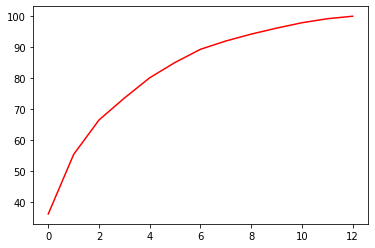

In [96]:
#Variance plot for PCA components obtained
plt.plot(var1, color = 'red')

In [97]:
#if we want to choose only first three pc's
pca_values[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [98]:
final_df = pd.DataFrame(pca_values[:,0:3], columns=['pc1','pc2', 'pc3'])

In [99]:
final_df

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# **PCA plot in 2-D**

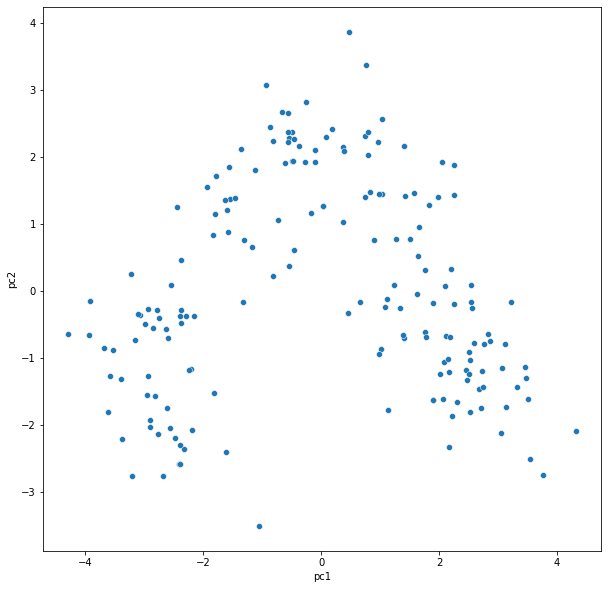

In [101]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=final_df,x='pc1',y='pc2')
plt.show()

Now let us perform **K-means** clustering on std_df data on which **PCA has been performed**.

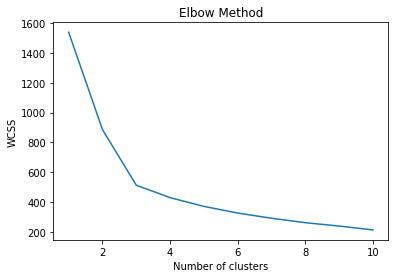

In [102]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(final_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can clearly check here k=3 is the optimal number of clusters as there is comparitively less change is graph after k=3.

In [105]:
from pandas.core.common import random_state
clusters_new = KMeans(3, random_state=32)
clusters_new.fit(final_df)

KMeans(n_clusters=3, random_state=32)

In [106]:
clusters_new.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [107]:
data['h_clusterid'] = clusters_new.labels_

In [108]:
data.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


Clusters in original data.

In [109]:
df.groupby('Type').agg(['mean']).reset_index()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [110]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [111]:
data.h_clusterid.value_counts()

0    65
2    62
1    51
Name: h_clusterid, dtype: int64

- So, from the above to tables we can see the clusters formed by K-means cluster are very similar to original data cluster.

- Only the number of data points in varying a little bit. 

- So we can conclude k = 3 will be an optimum number for clusters.

- Also by choosing first 3 PCA, we are choosing only 66.53% of data. 